In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve,auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
path1 = Path('/Users/zamiulalam/Documents/Humayera Apu Project/physionet.org/files/challenge-2019/1.0.0/training/training_setA')

df1 = pd.concat(
    (
        pd.read_csv(
            file,
            sep="|",
            engine="python"   # safer for irregular pipes
        )#.assign(source_file=file.name)
        for file in path1.glob("*.psv")
    ),
    ignore_index=True
)

In [3]:
path2 = Path('/Users/zamiulalam/Documents/Humayera Apu Project/physionet.org/files/challenge-2019/1.0.0/training/training_setB')

df2 = pd.concat(
    (
        pd.read_csv(
            file,
            sep="|",
            engine="python"   # safer for irregular pipes
        )#.assign(source_file=file.name)
        for file in path2.glob("*.psv")
    ),
    ignore_index=True
)

In [4]:
df = pd.concat([df1, df2], ignore_index=True) 

del df1,df2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1398811 non-null  float64
 1   O2Sat             1349474 non-null  float64
 2   Temp              525226 non-null   float64
 3   SBP               1325945 non-null  float64
 4   MAP               1358940 non-null  float64
 5   DBP               1065656 non-null  float64
 6   Resp              1313875 non-null  float64
 7   EtCO2             57636 non-null    float64
 8   BaseExcess        84145 non-null    float64
 9   HCO3              65028 non-null    float64
 10  FiO2              129365 non-null   float64
 11  pH                107573 non-null   float64
 12  PaCO2             86301 non-null    float64
 13  SaO2              53561 non-null    float64
 14  AST               25183 non-null    float64
 15  BUN               106568 non-null   float64
 16  

In [6]:
df.sample(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
573426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.94,0,1.0,0.0,-0.03,9,0
170711,72.0,95.0,NaN,106.0,74.00,59.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.42,1,0.0,1.0,-5.33,18,0
1170046,91.0,92.0,36.90,110.0,71.00,50.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.00,0,0.0,1.0,-299.35,12,0
870359,80.5,99.0,36.70,101.5,70.50,55.0,23.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.00,1,0.0,1.0,-122.13,5,0
347546,104.0,98.0,37.56,92.0,69.00,56.0,NaN,NaN,-3.0,NaN,NaN,7.32,45.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3,NaN,NaN,NaN,83.19,1,1.0,0.0,-0.02,23,0
442962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.15,0,NaN,NaN,-0.02,8,0
930628,72.0,100.0,37.20,100.0,70.00,53.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.00,1,0.0,1.0,-165.37,13,0
333404,71.5,100.0,35.56,145.0,79.67,NaN,29.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.86,0,0.0,1.0,-653.44,93,1
51313,63.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.37,1,NaN,NaN,-136.43,5,0
573461,57.0,97.0,NaN,105.0,69.00,48.0,16.0,NaN,8.0,30.0,NaN,7.41,55.0,NaN,NaN,17.0,NaN,8.6,102.0,0.4,NaN,221.0,NaN,2.5,2.9,4.0,NaN,NaN,29.4,10.0,NaN,16.0,NaN,199.0,61.33,0,1.0,0.0,-0.03,37,0


In [ ]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [ ]:
#Find the number of missing values in each column
missing_values = df.isnull().sum()

#Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df)) * 100

#Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})

missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
Bilirubin_direct,1549220,99.807371
Fibrinogen,1541968,99.340167
TroponinI,1537429,99.047745
Bilirubin_total,1529069,98.509158
Alkalinephos,1527269,98.393194
AST,1527027,98.377604
Lactate,1510764,97.329872
PTT,1506511,97.055875
SaO2,1498649,96.549372
EtCO2,1494574,96.286843


In [9]:
rows_nan = df[df['HospAdmTime'].isna()]

In [10]:
rows_nan

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
104064,81.0,96.0,37.83,154.0,95.33,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.18,1,1.0,0.0,NaN,2,0
104065,NaN,87.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.18,1,1.0,0.0,NaN,3,0
104066,71.0,94.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.18,1,1.0,0.0,NaN,4,0
104067,78.0,98.0,37.72,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.18,1,1.0,0.0,NaN,5,0
104068,74.0,95.5,NaN,152.0,92.67,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.18,1,1.0,0.0,NaN,6,0
104069,75.0,95.0,NaN,152.0,100.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.18,1,1.0,0.0,NaN,7,0
104070,81.0,95.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.18,1,1.0,0.0,NaN,8,0
104071,75.0,96.0,37.67,159.0,100.33,NaN,11.0,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,101.0,0.6,NaN,113.0,NaN,NaN,NaN,3.5,NaN,NaN,36.9,13.0,NaN,5.6,NaN,155.0,60.18,1,1.0,0.0,NaN,9,0


In [11]:
df = df.dropna(subset=['HospAdmTime'])

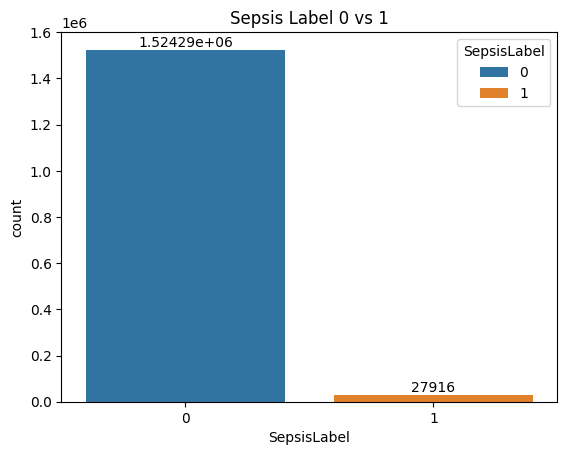

In [12]:
ax = sns.countplot(x='SepsisLabel', data=df, hue='SepsisLabel')
plt.title('Sepsis Label 0 vs 1')

for container in ax.containers:
    ax.bar_label(container) # type: ignore

plt.show()

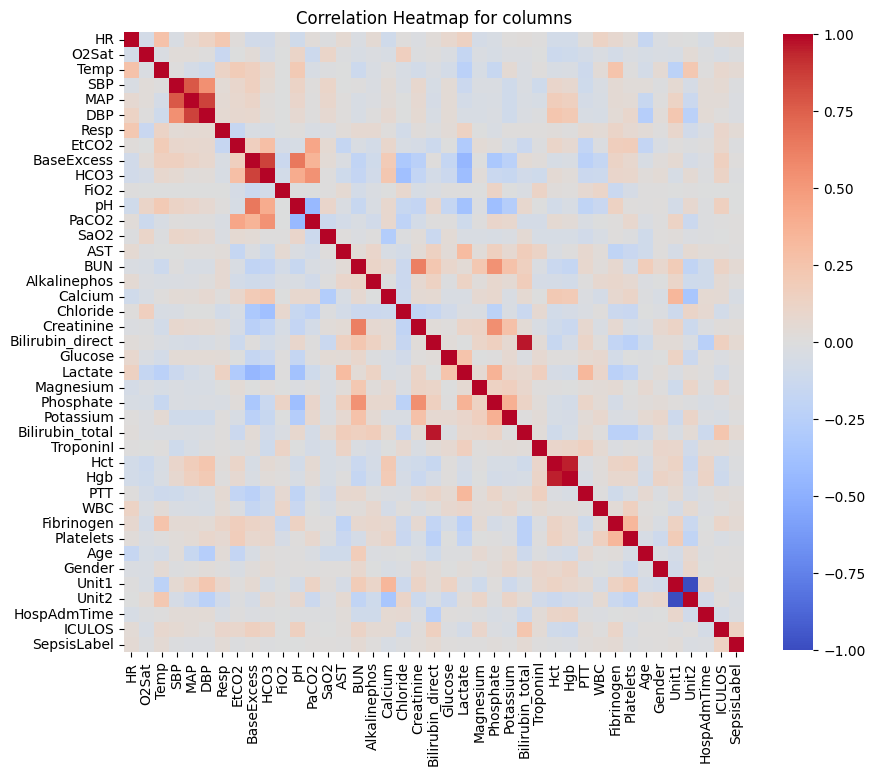

In [18]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title(f"Correlation Heatmap for columns")
plt.show()


In [19]:
cols = df.columns
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]

red_col = [col for col in cols if col not in to_drop]

In [20]:
red_col

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'FiO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Potassium',
 'TroponinI',
 'Hct',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender',
 'Unit1',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [21]:
dff = df[red_col]
dff['SepsisLabel'] = df['SepsisLabel']

del df

/var/folders/rz/xn1t5mlj5wv1k082mq_q2hdr0000gn/T/ipykernel_1686/881150455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['SepsisLabel'] = df['SepsisLabel']


In [22]:
dff['Patient_ID'] = pd.factorize(
    dff[['Age', 'Gender', 'HospAdmTime']]
    .astype(str)
    .agg('_'.join, axis=1)
)[0]

In [23]:
dff.sample(10)

,HR,O2Sat,Temp,SBP,Resp,EtCO2,BaseExcess,FiO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Bilirubin_direct,Glucose,Lactate,Magnesium,Potassium,TroponinI,Hct,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
812239,84.0,97.0,NaN,167.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.00,1,NaN,0.00,24,0,20061
1549990,82.0,97.0,37.20,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,1,0.0,-137.16,22,0,37449
569524,74.0,NaN,NaN,136.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.81,0,NaN,-0.03,2,0,14195
245929,78.0,98.0,38.10,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.41,1,0.0,-18.48,14,0,6232
67316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.87,0,NaN,-0.02,8,0,1717
583715,88.0,98.0,NaN,117.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.60,0,NaN,-0.03,14,0,14548
695195,128.0,100.0,37.61,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.30,0,NaN,-0.03,4,0,17278
200874,67.0,100.0,NaN,138.0,11.5,NaN,-8.0,0.4,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.66,1,NaN,-44.24,41,0,5116
431827,85.0,100.0,37.60,107.0,12.5,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.33,0,NaN,-161.87,28,0,10837
1304276,64.0,100.0,NaN,126.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00,0,0.0,-265.98,9,0,31876


In [24]:
len(dff['Patient_ID'].unique())

37503

In [25]:
grouped_by_patient = dff.groupby('Patient_ID')
df_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())

/var/folders/rz/xn1t5mlj5wv1k082mq_q2hdr0000gn/T/ipykernel_1686/1943879879.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())


In [26]:
df_impute.head(10)

HR  O2Sat   Temp     SBP  Resp  EtCO2  BaseExcess  FiO2  SaO2  \
Patient_ID                                                                      
0          0  80.0  100.0  36.50  121.00  13.5    NaN         1.0   1.0  77.0   
           1  76.0  100.0  36.25  113.25  12.0    NaN         1.0   0.5  94.0   
           2  80.0  100.0  36.25  132.75  12.0    NaN        -3.0   0.5  94.0   
           3  78.0  100.0  36.10  103.50  12.0    NaN        -3.0   0.5  94.0   
           4  74.0  100.0  36.00  128.75  12.5    NaN        -3.0   0.5  94.0   
           5  76.0  100.0  36.20  124.00  14.0    NaN         0.0   0.5  94.0   
           6  70.0  100.0  36.10  120.25  14.0    NaN         0.0   0.5  94.0   
           7  67.0  100.0  36.40  130.50  14.0    NaN         0.0   0.5  94.0   
           8  64.5  100.0  36.55  116.75  14.0    NaN         0.0   0.5  94.0   
           9  65.0   99.0  36.90  117.50  21.0    NaN         0.0   0.5  94.0   

               AST   BUN  Alkalinephos  Calcium  Chloride  Bilirubin_direct  \
Patient_ID                                                                    
0          0  42.0  53.0          49.0      8.0     111.0               NaN   
           1  42.0  53.0          49.0      8.0     111.0               NaN   
           2  42.0  45.0          49.0      8.0     109.0               NaN   
           3  42.0  45.0          49.0      8.0     109.0               NaN   
           4  42.0  45.0          49.0      8.0     109.0               NaN   
           5  42.0  45.0          49.0      8.0     109.0               NaN   
           6  42.0  45.0          49.0      8.0     109.0               NaN   
           7  42.0  43.0          49.0      8.0     108.0               NaN   
           8  42.0  43.0          49.0      8.0     108.0               NaN   
           9  42.0  43.0          49.0      8.0     108.0               NaN   

              Glucose  Lactate  Magnesium  Potassium  TroponinI   Hct   PTT  \
Patient_ID                                                                    
0          0    107.0      2.4        2.8        3.7        NaN  27.9  38.1   
           1    112.5      1.3        2.8        4.2        NaN  27.9  29.7   
           2    112.5      1.3        2.8        4.2        NaN  28.5  29.7   
           3    112.5      1.3        2.8        4.2        NaN  28.5  29.7   
           4    151.5      1.3        2.8        4.7        NaN  28.5  29.7   
           5    151.5      1.3        2.8        4.7        NaN  28.5  29.7   
           6    127.0      1.3        2.8        4.7        NaN  28.5  29.7   
           7    127.0      1.0        2.8        5.1        NaN  29.9  29.7   
           8    107.0      1.0        2.8        5.1        NaN  29.9  29.7   
           9    107.0      1.0        2.8        5.1        NaN  29.9  29.7   

               WBC  Fibrinogen  Platelets    Age  Gender  Unit1  HospAdmTime  \
Patient_ID                                                                     
0          0   9.9       223.0      160.0  77.27       1    0.0       -69.14   
           1   9.9       223.0      169.0  77.27       1    0.0       -69.14   
           2  12.0       223.0      169.0  77.27       1    0.0       -69.14   
           3  12.0       223.0      169.0  77.27       1    0.0       -69.14   
           4  12.0       223.0      169.0  77.27       1    0.0       -69.14   
           5  12.0       223.0      169.0  77.27       1    0.0       -69.14   
           6  12.0       223.0      154.0  77.27       1    0.0       -69.14   
           7  10.1       223.0      154.0  77.27       1    0.0       -69.14   
           8  10.1       223.0      154.0  77.27       1    0.0       -69.14   
           9  10.1       223.0      154.0  77.27       1    0.0       -69.14   

              ICULOS  SepsisLabel  Patient_ID  
Patient_ID                                     
0          0       3            0           0  
           1       4            0       

In [28]:
#Find the number of missing values in each column
missing_values = df_impute.isnull().sum()

#Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_impute)) * 100

#Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})

missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
Bilirubin_direct,1402269,90.340626
EtCO2,1351705,87.083060
Fibrinogen,1293003,83.301207
TroponinI,1224893,78.913247
BaseExcess,943504,60.784872
Lactate,925450,59.621750
SaO2,919842,59.260457
Alkalinephos,884472,56.981759
AST,877219,56.514487
FiO2,720119,46.393382


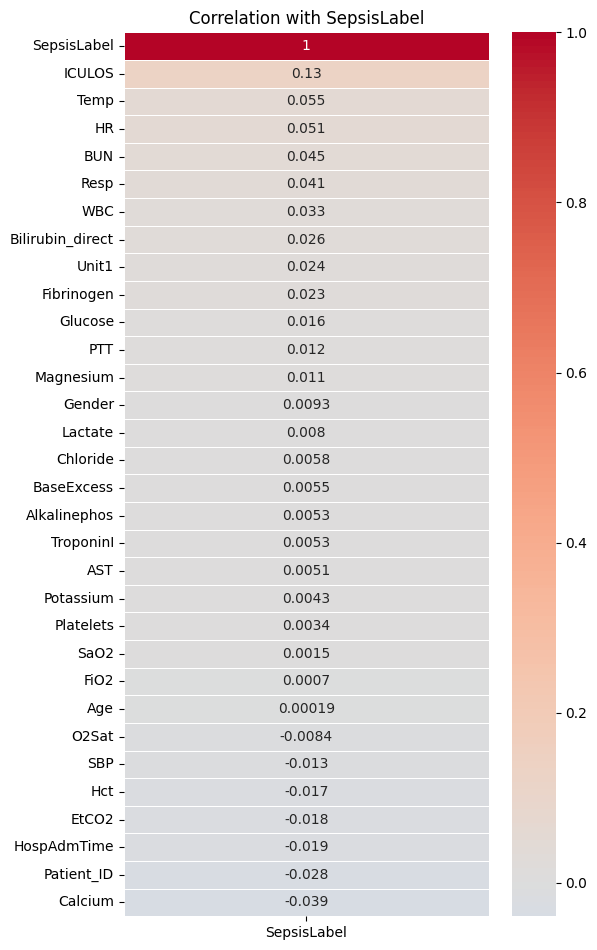

In [30]:
# Keep only numeric columns
corr = df_impute.corr()

# Extract correlations with SepsisLabel
sepsis_corr = corr[['SepsisLabel']].sort_values(by='SepsisLabel', ascending=False)

plt.figure(figsize=(6, max(6, 0.3 * len(sepsis_corr))))
sns.heatmap(
    sepsis_corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation with SepsisLabel")
plt.tight_layout()
plt.show()

In [31]:
y = df_impute['SepsisLabel']
X = df_impute.drop(columns=['SepsisLabel','Patient_ID','HospAdmTime']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: SepsisLabel, dtype: int64

In [90]:
X.head()

,HR,O2Sat,Temp,Resp,FiO2,SaO2,AST,BUN,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,TroponinI,Hct,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,Unit1
0,80.0,100.0,36.50,13.5,1.0,77.0,NaN,53.0,111.0,2.1,NaN,107.0,2.4,NaN,27.9,9.9,160.0,77.27,1,-69.14,3,0.0
1,76.0,100.0,36.25,12.0,0.5,NaN,NaN,53.0,111.0,NaN,NaN,NaN,NaN,NaN,27.9,9.9,NaN,77.27,1,-69.14,4,0.0
2,80.0,100.0,36.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,-69.14,5,0.0
3,78.0,100.0,36.10,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.5,NaN,NaN,NaN,NaN,NaN,77.27,1,-69.14,6,0.0
4,74.0,100.0,36.00,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,-69.14,7,0.0


In [32]:
print("XGBoost version:", xgb.__version__)

clf = xgb.XGBClassifier( 
    n_estimators=1000,
    max_depth=12, 
    learning_rate=0.02, 
    subsample=0.8,
    colsample_bytree=0.4, 
    eval_metric= 'aucpr',
    nthread=4,
    tree_method='hist',  # Use CPU if GPU is not available
    #tree_method='gpu_hist' # Use GPU if GPU is available
    early_stopping_rounds=10
)
h = clf.fit(X_train, y_train, 
    eval_set=[(X_test,y_test)],
    verbose=50)

XGBoost version: 3.0.2
[0]	validation_0-aucpr:0.17707
[50]	validation_0-aucpr:0.60844
[100]	validation_0-aucpr:0.71511
[150]	validation_0-aucpr:0.78701
[200]	validation_0-aucpr:0.83109
[250]	validation_0-aucpr:0.86261
[300]	validation_0-aucpr:0.88389
[350]	validation_0-aucpr:0.89661
[400]	validation_0-aucpr:0.90811
[450]	validation_0-aucpr:0.91590
[500]	validation_0-aucpr:0.92400
[550]	validation_0-aucpr:0.92989
[600]	validation_0-aucpr:0.93471
[650]	validation_0-aucpr:0.93910
[700]	validation_0-aucpr:0.94319
[750]	validation_0-aucpr:0.94644
[800]	validation_0-aucpr:0.94930
[850]	validation_0-aucpr:0.95156
[900]	validation_0-aucpr:0.95370
[950]	validation_0-aucpr:0.95573
[999]	validation_0-aucpr:0.95710


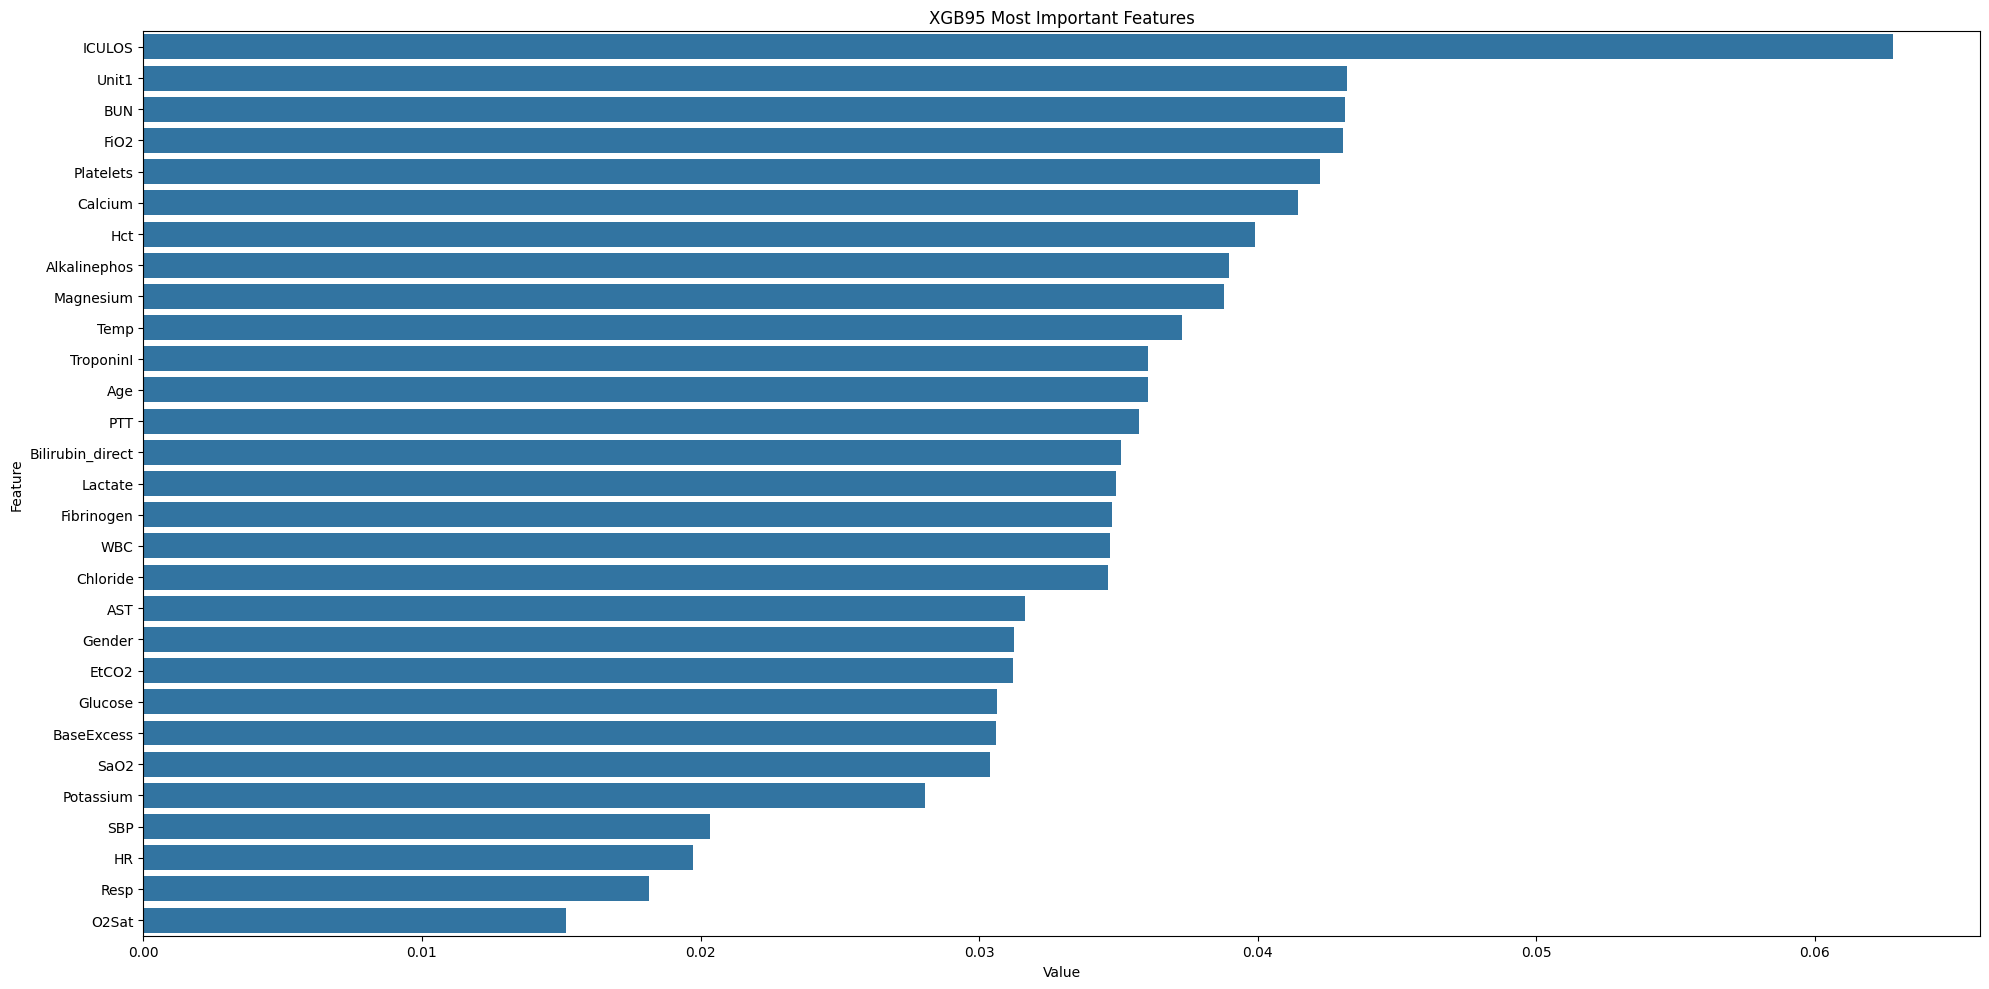

In [33]:
cols = X.columns.to_list()
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,cols)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
plt.title('XGB95 Most Important Features')
plt.tight_layout()
plt.show()

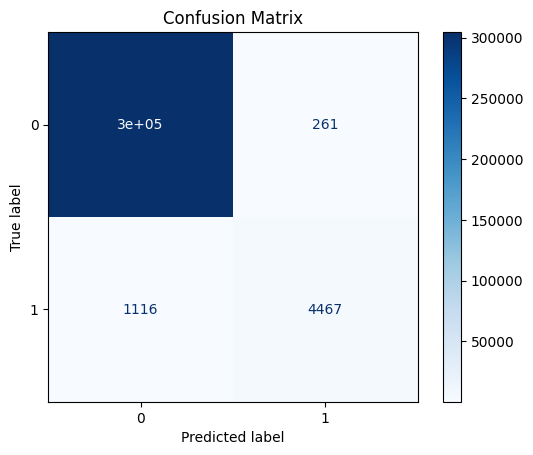

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels for the validation set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Best F1: 0.9027 at threshold: 0.2869
auc 0.9571039206747685


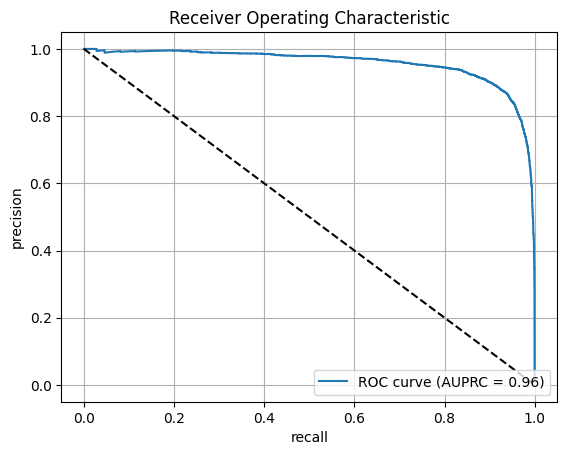

In [40]:
# Get predicted probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_test.astype(int).values, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
roc_auc = auc(fpr, tpr)


# Compute ROC curve and AUC
precision, recall, threshold = precision_recall_curve(y_test.astype(int).values, y_probs)
f1_scores = 2 * precision * recall / (precision + recall + 1e-8)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

best_index = np.argmax(f1_scores)
best_threshold = threshold[best_index]

roc_auc = auc(recall, precision)
print(f"Best F1: {f1_scores[best_index]:.4f} at threshold: {best_threshold:.4f}")
print("auc", roc_auc)
plt.figure()
plt.plot(recall,precision, label=f'ROC curve (AUPRC = {roc_auc:.2f})')
plt.plot([0, 1], [1, 0], 'k--')  # Diagonal line
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()